In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, DenseNet121
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Function to build models
def build_model(base_model, preprocess_func, input_shape=(224, 224, 3), num_classes=4):
    base = base_model(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
# Paths to your dataset
train_path = '/content/drive/MyDrive/Training/'
test_path = '/content/drive/MyDrive/Testing/'


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)

# Directory paths
train_dir = '/content/drive/MyDrive/Training'
test_dir = '/content/drive/MyDrive/Testing'

# Load training and testing data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define Sequential CNN model
seq_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
seq_model.summary()

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ---------------------- VGG16 ----------------------
vgg_datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess, validation_split=0.2)

vgg_train_gen = vgg_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                batch_size=32, class_mode='categorical', subset='training')

vgg_val_gen = vgg_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                              batch_size=32, class_mode='categorical', subset='validation')

vgg_model = build_model(VGG16, vgg_preprocess, num_classes=4)
vgg_history = vgg_model.fit(vgg_train_gen, validation_data=vgg_val_gen, epochs=30)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.4811 - loss: 2.6440 - val_accuracy: 0.6719 - val_loss: 0.7602
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.7292 - loss: 0.6674 - val_accuracy: 0.7365 - val_loss: 0.6413
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.7915 - loss: 0.5418 - val_accuracy: 0.7487 - val_loss: 0.6130
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 261ms/step - accuracy: 0.8395 - loss: 0.4335 - val_accuracy: 0.7766 - val_loss: 0.5632
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.8407 - loss: 0.4263 - val_accuracy: 0.8080 - val_loss: 0.5257
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - accuracy: 0.8604 - loss: 0.3641 - val_accuracy: 0.8063 - val_loss: 0.5233
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.8852 - loss: 0.3261 - val_accuracy: 0.7958 - val_loss: 0.5443
Epoch 8/30
72/

In [ ]:
# ---------------------- ResNet50 ----------------------
resnet_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess, validation_split=0.2)

resnet_train_gen = resnet_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                      batch_size=32, class_mode='categorical', subset='training')

resnet_val_gen = resnet_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical', subset='validation')

resnet_model = build_model(ResNet50, resnet_preprocess, num_classes=4)
resnet_history = resnet_model.fit(resnet_train_gen, validation_data=resnet_val_gen, epochs=30)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 35s 339ms/step - accuracy: 0.5705 - loss: 1.2323 - val_accuracy: 0.7208 - val_loss: 0.6561
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.7895 - loss: 0.5300 - val_accuracy: 0.7714 - val_loss: 0.5446
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - accuracy: 0.8551 - loss: 0.4074 - val_accuracy: 0.7784 - val_loss: 0.5726
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.8521 - loss: 0.3526 - val_accuracy: 0.8133 - val_loss: 0.5074
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.8788 - loss: 0.3146 - val_accuracy: 0.8063 - val_loss: 0.5332
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.8851 - loss: 0.3051 - val_accuracy: 0.8185 - val_loss: 0.5434
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.8914 - loss: 0.2709 - val_accuracy: 0.8237 - val_loss: 0.4937
Epoch 8/30
72/

In [ ]:
# ---------------------- InceptionV3 ----------------------
inception_datagen = ImageDataGenerator(preprocessing_function=inception_preprocess, validation_split=0.2)

inception_train_gen = inception_datagen.flow_from_directory(train_path, target_size=(299, 299),
                                                            batch_size=32, class_mode='categorical', subset='training')

inception_val_gen = inception_datagen.flow_from_directory(train_path, target_size=(299, 299),
                                                          batch_size=32, class_mode='categorical', subset='validation')

inception_model = build_model(InceptionV3, inception_preprocess, input_shape=(299, 299, 3), num_classes=4)
inception_history = inception_model.fit(inception_train_gen, validation_data=inception_val_gen, epochs=30)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 419ms/step - accuracy: 0.5642 - loss: 1.0512 - val_accuracy: 0.7051 - val_loss: 0.7201
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.7920 - loss: 0.5476 - val_accuracy: 0.6736 - val_loss: 0.7496
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.8093 - loss: 0.4913 - val_accuracy: 0.7696 - val_loss: 0.5745
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.8323 - loss: 0.4114 - val_accuracy: 0.7749 - val_loss: 0.5449
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.8541 - loss: 0.3911 - val_accuracy: 0.7714 - val_loss: 0.5862
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.8719 - loss: 0.3470 - val_accuracy: 0.7853 - val_loss: 0.5292
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.8753 - loss: 0.3193 - val_accuracy: 0.7906 - val_loss: 0.5148
Epoch 8/30
72/

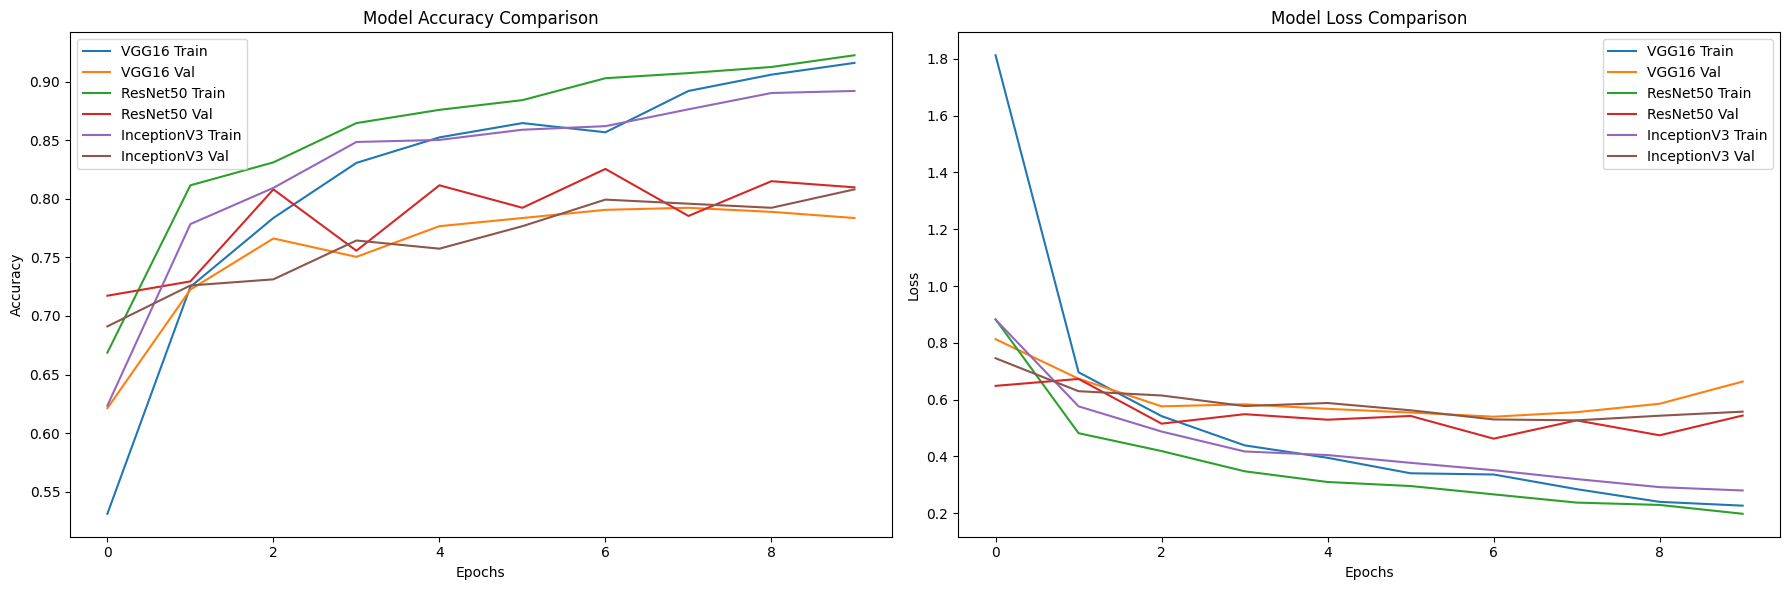

In [ ]:
# ---------------------- Plot Comparison Graph ----------------------
def plot_model_history(histories, titles):
    plt.figure(figsize=(18, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], label=f'{label} Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, titles):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], label=f'{label} Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call plotting function
plot_model_history(
    histories=[vgg_history, resnet_history, inception_history],
    titles=['VGG16', 'ResNet50', 'InceptionV3']
)

In [ ]:
vgg_model.save('/content/drive/MyDrive/vgg16_brain_tumor_model212.h5')


In [ ]:
print("VGG16 Accuracy:", max(vgg_history.history['val_accuracy']))
print("ResNet50 Accuracy:", max(resnet_history.history['val_accuracy']))
print("InceptionV3 Accuracy:", max(inception_history.history['val_accuracy']))

VGG16 Accuracy: 0.8464223146438599
ResNet50 Accuracy: 0.8551483154296875
InceptionV3 Accuracy: 0.8411867618560791


In [ ]:
# ---------------------- DenseNet121 ----------------------
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
densenet_datagen = ImageDataGenerator(preprocessing_function=densenet_preprocess, validation_split=0.2)
densenet_train_gen = densenet_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                          batch_size=32, class_mode='categorical', subset='training')
densenet_val_gen = densenet_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                        batch_size=32, class_mode='categorical', subset='validation')
densenet_model = build_model(DenseNet121, densenet_preprocess, input_shape=(224, 224, 3), num_classes=4)
densenet_history = densenet_model.fit(densenet_train_gen, validation_data=densenet_val_gen, epochs=30)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 84s 749ms/step - accuracy: 0.5012 - loss: 1.2198 - val_accuracy: 0.7452 - val_loss: 0.6876
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.7575 - loss: 0.6296 - val_accuracy: 0.7696 - val_loss: 0.6194
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.8010 - loss: 0.5105 - val_accuracy: 0.7627 - val_loss: 0.5811
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.8396 - loss: 0.4130 - val_accuracy: 0.8028 - val_loss: 0.5272
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.8719 - loss: 0.3617 - val_accuracy: 0.7836 - val_loss: 0.5490
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.8651 - loss: 0.3516 - val_accuracy: 0.7871 - val_loss: 0.5500
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.8818 - loss: 0.3194 - val

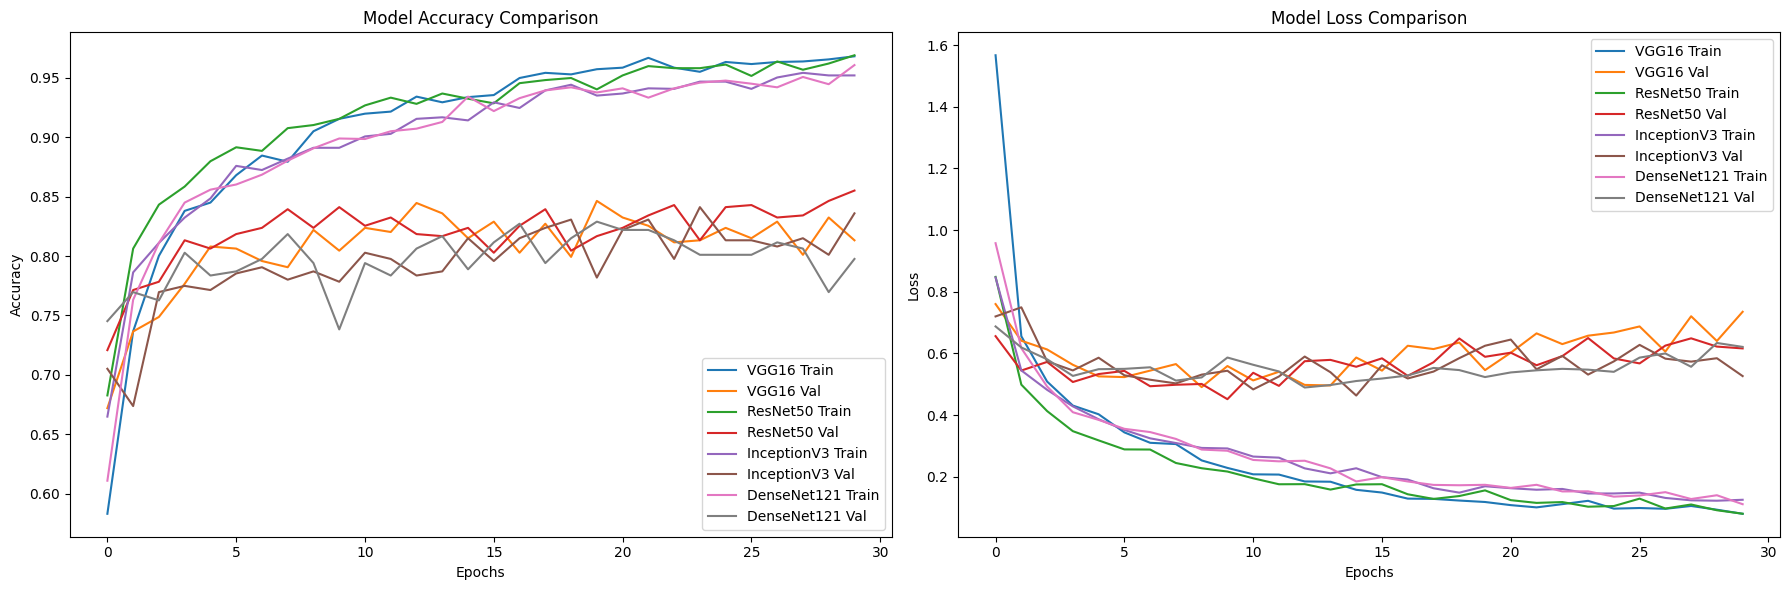

In [ ]:
# ---------------------- Plot Comparison Graph ----------------------
def plot_model_history(histories, titles):
    plt.figure(figsize=(18, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], label=f'{label} Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, titles):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], label=f'{label} Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call plotting function
plot_model_history(
    histories=[vgg_history, resnet_history, inception_history, densenet_history],
    titles=['VGG16', 'ResNet50', 'InceptionV3', 'DenseNet121']
)

In [ ]:
print("VGG16 Accuracy:", max(vgg_history.history['val_accuracy']))
print("ResNet50 Accuracy:", max(resnet_history.history['val_accuracy']))
print("InceptionV3 Accuracy:", max(inception_history.history['val_accuracy']))
print("DenseNet121 Accuracy:", max(densenet_history.history['val_accuracy']))


VGG16 Accuracy: 0.8464223146438599
ResNet50 Accuracy: 0.8551483154296875
InceptionV3 Accuracy: 0.8411867618560791
DenseNet121 Accuracy: 0.8289703130722046


In [ ]:
resnet_model.save('/content/drive/MyDrive/resnet50_model.h5')
